In [4]:
import pandas as pd
import numpy as np

import nltk

from googletrans import Translator

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
mpl.rcParams['figure.figsize'] = (16, 12)
mpl.rcParams['axes.grid'] = False

# Reading clean text

In [12]:
df = pd.read_csv('Corpus/big_corpus_cleaned.csv')
df['text'] = df['text'].astype(str)
df['label'] = pd.to_numeric(df['label'])
df

,text,label
0,лива туввар сирия аллажатта islamstateқа қарсы...,1
1,террористік иттер бүлікшілерге айналады turke...,1
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1
4,ядролық соғыс соғысы келе жатыр,1
...,...,...
45387,жақсы өмір сүруге тыйым сала алмайсын,2
45388,дің концертіне жиналған иглздар,2
45389,панданың қалай пайда болғанын енді түсіндім,2
45390,"мүбәрәк болсын жұмаңыз , қабыл болсын дұғаңыз ...",2


# Translating

In [88]:
translator = Translator()
#df['tranlated'] = translator.translate(df.text.tolist(), dest='en').text

# Visualization

In [18]:
n_tops = 20

In [84]:
def get_gram(data_list, n):
    #stop = ['ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'пен', 'тағыда', 'әрине', 'жоқ', 'сондай', 'осындай', 'осылай', 'солай', 'мұндай', 'бұндай', 'мен', 'сен', 'ол', 'біз', 'біздер', 'олар', 'сіз', 'сіздер', 'маған', 'оған', 'саған', 'біздің', 'сіздің', 'оның', 'бізге', 'сізге', 'оларға', 'біздерге', 'сіздерге', 'оларға', 'менімен', 'сенімен', 'онымен', 'бізбен', 'сізбен', 'олармен', 'біздермен', 'сіздермен', 'менің', 'сенің', 'біздің', 'сіздің', 'оның', 'біздердің', 'сіздердің', 'олардың', 'маған', 'саған', 'оған', 'менен', 'сенен', 'одан', 'бізден', 'сізден', 'олардан', 'біздерден', 'сіздерден', 'олардан', 'айтпақшы', 'сонымен', 'сондықтан', 'бұл', 'осы', 'сол', 'анау', 'мынау', 'сонау', 'осынау', 'ана', 'мына', 'сона', 'әні', 'міне', 'өй', 'үйт', 'бүйт', 'біреу', 'кейбіреу', 'кейбір', 'қайсыбір', 'әрбір', 'бірнеше', 'бірдеме', 'бірнеше', 'әркім', 'әрне', 'әрқайсы', 'әрқалай', 'әлдекім', 'әлдене', 'әлдеқайдан', 'әлденеше', 'әлдеқалай', 'әлдеқашан', 'алдақашан', 'еш', 'ешкім', 'ешбір', 'ештеме', 'дәнеңе', 'ешқашан', 'ешқандай', 'ешқайсы', 'емес', 'бәрі', 'барлық', 'барша', 'бар', 'күллі', 'бүкіл', 'түгел', 'өз', 'өзім', 'өзің', 'өзінің', 'өзіме', 'өзіне', 'өзімнің', 'өзі', 'өзге', 'менде', 'сенде', 'онда', 'менен', 'сенен\tонан', 'одан', 'ау', 'па', 'ей', 'әй', 'е', 'уа', 'уау', 'уай', 'я', 'пай', 'ә', 'о', 'оһо', 'ой', 'ие', 'аһа', 'ау', 'беу', 'мәссаған', 'бәрекелді', 'әттегенай', 'жаракімалла', 'масқарай', 'астапыралла', 'япырмай', 'ойпырмай', 'кәне', 'кәнеки', 'ал', 'әйда', 'кәні', 'міне', 'әні', 'сорап', 'қош-қош', 'пфша', 'пішә', 'құрау-құрау', 'шәйт', 'шек', 'моһ', 'тәк', 'құрау', 'құр', 'кә', 'кәһ', 'күшім', 'күшім', 'мышы', 'пырс', 'әукім', 'алақай', 'паһ-паһ', 'бәрекелді', 'ура', 'әттең', 'әттеген-ай', 'қап', 'түге', 'пішту', 'шіркін', 'алатау', 'пай-пай', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'арс', 'гүрс', 'дүрс', 'қорс', 'тарс', 'тырс', 'ырс', 'барқ', 'борт', 'күрт', 'кірт', 'морт', 'сарт', 'шырт', 'дүңк', 'күңк', 'қыңқ', 'мыңқ', 'маңқ', 'саңқ', 'шаңқ', 'шіңк', 'сыңқ', 'таңқ', 'тыңқ', 'ыңқ', 'болп', 'былп', 'жалп', 'желп', 'қолп', 'ірк', 'ырқ', 'сарт-сұрт', 'тарс-тұрс', 'арс-ұрс', 'жалт-жалт', 'жалт-жұлт', 'қалт-қалт', 'қалт-құлт', 'қаңқ-қаңқ', 'қаңқ-құңқ', 'шаңқ-шаңқ', 'шаңқ-шұңқ', 'арбаң-арбаң', 'бүгжең-бүгжең', 'арсалаң-арсалаң', 'ербелең-ербелең', 'батыр-бұтыр', 'далаң-далаң', 'тарбаң-тарбаң', 'қызараң-қызараң', 'қаңғыр-күңгір', 'қайқаң-құйқаң', 'митың-митың', 'салаң-сұлаң', 'ыржың-тыржың', 'бірақ', 'алайда', 'дегенмен', 'әйтпесе', 'әйткенмен', 'себебі', 'өйткені', 'сондықтан', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'арнайы', 'осындай', 'ғана', 'қана', 'тек', 'әншейін', 'мен', 'да', 'бола', 'бір', 'де', 'сен', 'мені', 'сені', 'және', 'немесе', 'оны', 'еді', 'жатыр', 'деп', 'деді', 'тұр', 'тар', 'жаты', 'болып', ' ']
    vectorizer = CountVectorizer(ngram_range =(n, n))
    #vectorizer = TfidfVectorizer(ngram_range = (n,n))
    X = vectorizer.fit_transform(data_list)
    features = (vectorizer.get_feature_names())
    sums = X.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0,col] ))
    ranking = pd.DataFrame(data1, columns = ['term','value'])
    words = (ranking.sort_values('value', ascending = False))
    words = words.head(200)
    words['term'] = [translate.text if len(translate.text.split(' ')) >= n else translate.text + " ." for translate in translator.translate(words.term.tolist(), src='kk', dest='en')]
    return  words

def plotting_ngram(gram_df, n):
    gram = pd.DataFrame(gram_df[:n])
    d = gram.set_index('term').T.to_dict('rank')[:1]

    G = nx.Graph()
    
    for k, v in d[0].items():
        G.add_edge(k.split()[0], k.split()[1], weight=(v * 10))

    fig, ax = plt.subplots(figsize=(12, 8))

    pos = nx.spring_layout(G, k=2)

    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='blue',
                     node_color='red',
                     with_labels = False,
                     ax=ax)

    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='purple', alpha=0.25),
                horizontalalignment='center', fontsize=10)
    
    plt.show()

In [58]:
df.loc[df['label'] == 0]

,text,label
1794,"пайғамбарымыздың артынан еру, бұл біздің ең ба...",0
1795,"күмәнданған кезде, шоқыну керек деген сияқты с...",0
1796,сұрақ ассаламу алайкум уа раxматуллаһи уа бара...,0
1797,"сұрақ егер біреу не үшін намаз оқу керек , деп...",0
1798,"сұрақ ибн баз, ибн усаймин, альбани бұлар мүшр...",0
...,...,...
38523,"әлғаний бай, ештеңеге мұқтаж емес",0
38524,"әлмааниғ тыйым салушы, тоқтатушы",0
38525,"әннуур нұр иесі, нұрландырушы",0
38526,ассабуур аса сабырлы club qissa angimeler,0


In [21]:
nltk

<module 'nltk' from 'c:\\users\\zhastay\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\nltk\\__init__.py'>

In [43]:
unigram_df_t = get_gram(df.loc[df['label'] == 1].text.tolist(), 1).head(n_tops*10)
unigram_df_t['term'] = [translate.text for translate in translator.translate(unigram_df_t.term.tolist(), src='kk', dest='en')]
print ("\n\nUnigram extremistical : \n", unigram_df_t.head(n_tops))

unigram_df_n = get_gram(df.loc[df['label'] == 0].text.tolist(), 1).head(n_tops*10)
unigram_df_n['term'] = [translate.text for translate in translator.translate(unigram_df_n.term.tolist(), src='kk', dest='en')]
print ("\n\nUnigram neutral : \n", unigram_df_n.head(n_tops))

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))




Unigram extremistical : 
             term  value
27138     versus    778
12436     should    502
11620      Islam    497
30446   military    448
5372         was    423
7918          if    387
7666   religious    359
5337     will be    346
4448       other    344
5464         was    339
21367    Taliban    337
1109         man    303
15966   possible    298
17141       them    284
24775     attack    275
7060        that    266
3800          US    261
7976         two    256
9586        Good    251
1115      people    239


c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))




Unigram neutral : 
                term  value
4313          Allah   9535
19914          that   5106
1651            man   4749
4359         of God   4313
14945       will be   4284
22443            if   3495
15227            if   3416
52142          what   3189
28672          Good   2943
25021          most   2830
15246           let   2757
102862      further   2654
64517          then   2641
42129           day   2631
20020          says   2501
51544        prayer   2450
38675        should   2422
56534   the prophet   2421
4394            god   2408
22747           two   2257


[Text(0, 0, 'versus'),
 Text(0, 0, 'should'),
 Text(0, 0, 'Islam'),
 Text(0, 0, 'military'),
 Text(0, 0, 'was'),
 Text(0, 0, 'if'),
 Text(0, 0, 'religious'),
 Text(0, 0, 'will be'),
 Text(0, 0, 'other'),
 Text(0, 0, 'Taliban'),
 Text(0, 0, 'man'),
 Text(0, 0, 'possible'),
 Text(0, 0, 'them'),
 Text(0, 0, 'attack'),
 Text(0, 0, 'that'),
 Text(0, 0, 'US'),
 Text(0, 0, 'two'),
 Text(0, 0, 'Good'),
 Text(0, 0, 'people')]

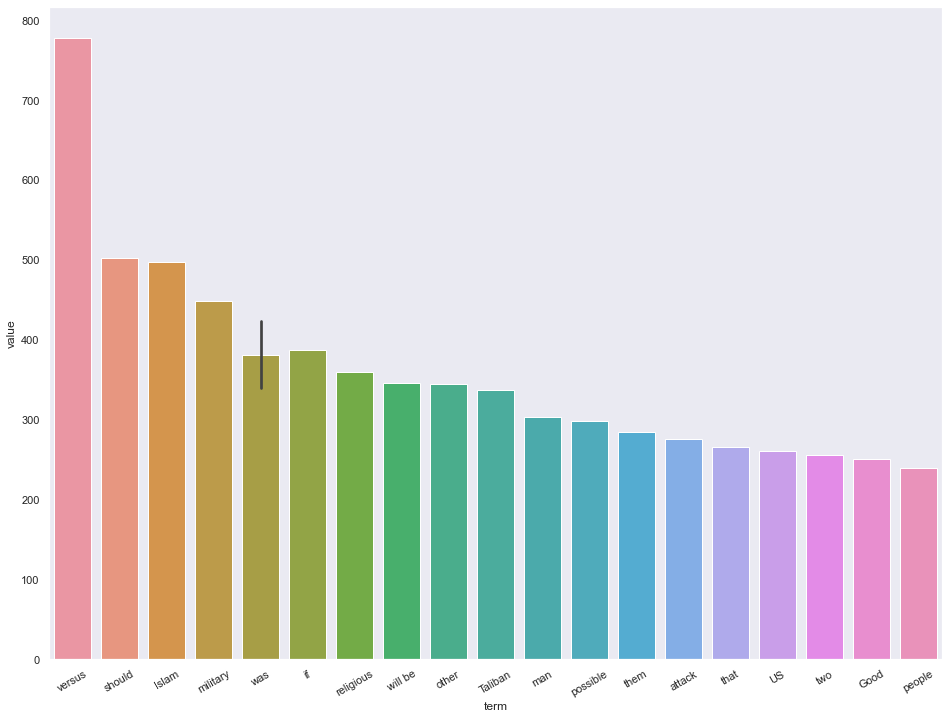

In [44]:
g = sns.barplot(x="term", y="value", data=unigram_df_t[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'Allah'),
 Text(0, 0, 'that'),
 Text(0, 0, 'man'),
 Text(0, 0, 'of God'),
 Text(0, 0, 'will be'),
 Text(0, 0, 'if'),
 Text(0, 0, 'what'),
 Text(0, 0, 'Good'),
 Text(0, 0, 'most'),
 Text(0, 0, 'let'),
 Text(0, 0, 'further'),
 Text(0, 0, 'then'),
 Text(0, 0, 'day'),
 Text(0, 0, 'says'),
 Text(0, 0, 'prayer'),
 Text(0, 0, 'should'),
 Text(0, 0, 'the prophet'),
 Text(0, 0, 'god'),
 Text(0, 0, 'two')]

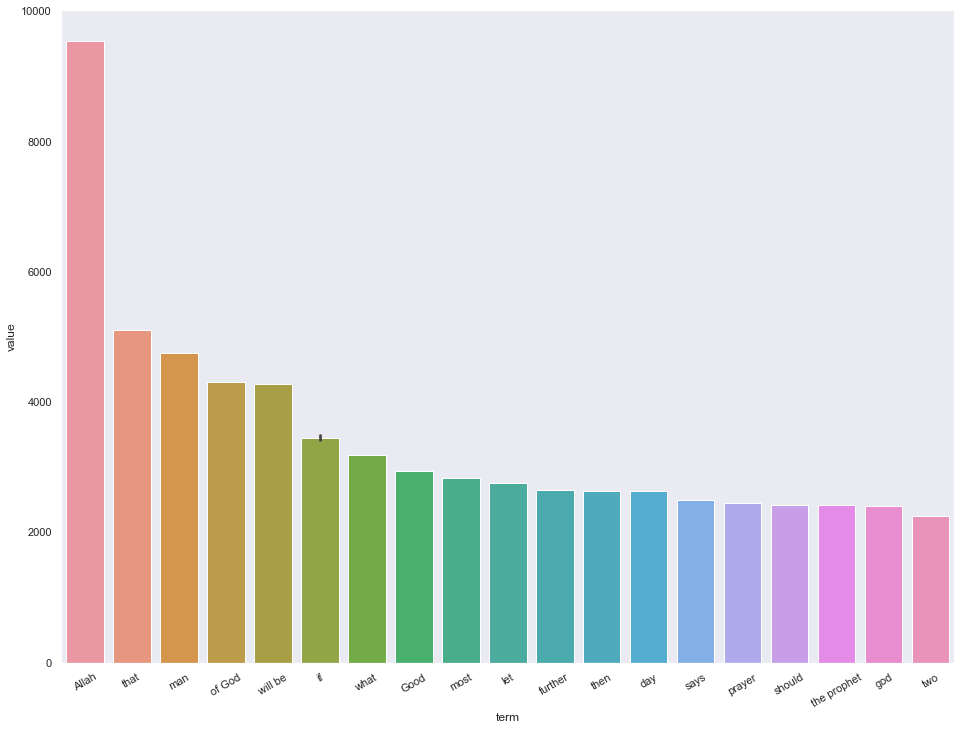

In [45]:
g = sns.barplot(x="term", y="value", data=unigram_df_n[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

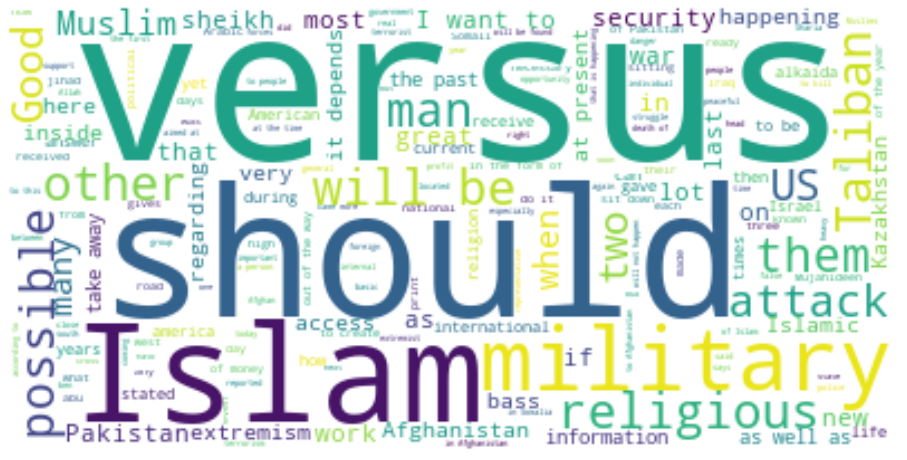

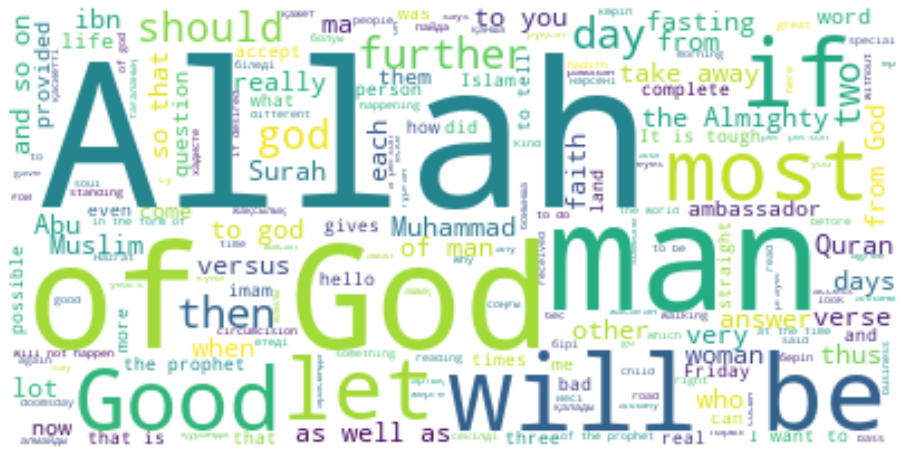

In [47]:
unidict = dict(unigram_df_t.values)
wordcloud = WordCloud(max_words=2000,background_color="white").generate_from_frequencies(unidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

unidict = dict(unigram_df_n.values)
wordcloud = WordCloud(max_words=2000,background_color="white").generate_from_frequencies(unidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bigram



Bigram : 
                        term  value
84083      at the same time    121
83025            after that    115
46972               and his    114
46963             and their     92
30582           stated that     89
21041                  is .     86
46345                and we     76
89476             another .     75
46960              and they     75
117734              still .     71
46378              and this     69
46285            and others     67
16374               other .     67
90374     against terrorism     66
101453        extremism and     66
84067      at the same time     64
20912                may be     63
32189   religious extremism     61
32990               if they     60
29808               he said     58


c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: DataFrame columns are not unique, some columns will be omitted.


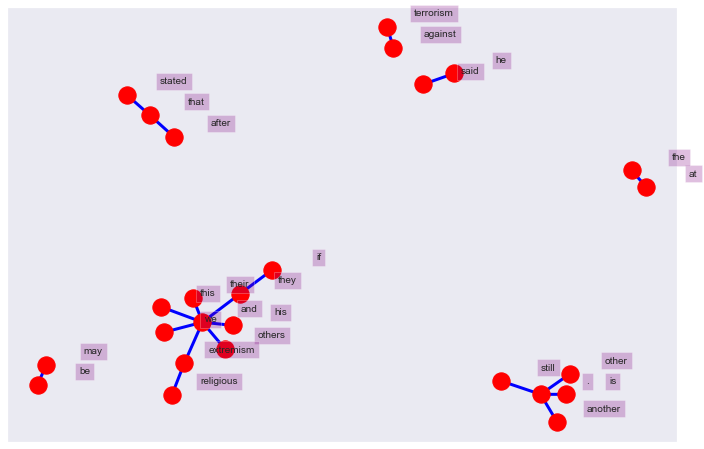

In [77]:
bigram_df_t = get_gram(df.loc[df['label'] == 1].text.tolist(), 2)
print ("\n\nBigram : \n", bigram_df_t.head(n_tops))
plotting_ngram(bigram_df_t, n_tops)

In [89]:
bigram_df_n = get_gram(df.loc[df['label'] == 0].text.tolist(), 2)

,term,value
25330,God Almighty,1569
416734,hello .,788
412392,verse of surah,772
298427,and hello,749
354675,God bless him,676
...,...,...
335596,he is a man,115
153332,if God,115
421166,and field,115
117913,here .,114




Bigram : 
                     term  value
25330       God Almighty   1569
416734           hello .    788
412392    verse of surah    772
298427         and hello    749
354675     God bless him    676
233997          good and    668
371089      be satisfied    589
141146     the answer is    566
24798   Messenger of God    560
26544     God's blessing    517
27904       God Almighty    505
108026           one day    489
94423         although .    478
527701        doomsday .    469
483885          really .    466
164454   especially kind    425
25339             of God    423
28495            god too    419
101705            says .    395
3607         human being    354


c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: DataFrame columns are not unique, some columns will be omitted.


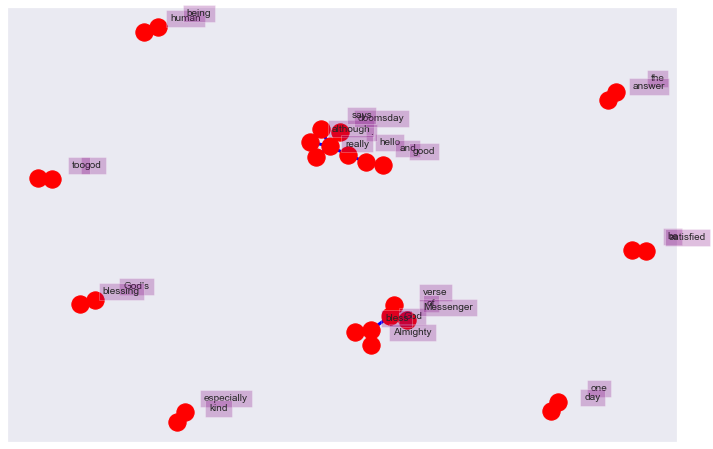

In [90]:
bigram_df_n['term'][17] = 'alla tagala'
bigram_df_n['term'][18] = 'allahu ta'
print ("\n\nBigram : \n", bigram_df_n.head(n_tops))
plotting_ngram(bigram_df_n, n_tops)

[Text(0, 0, 'at the same time'),
 Text(0, 0, 'after that'),
 Text(0, 0, 'and his'),
 Text(0, 0, 'and their'),
 Text(0, 0, 'stated that'),
 Text(0, 0, 'is .'),
 Text(0, 0, 'and we'),
 Text(0, 0, 'another .'),
 Text(0, 0, 'and they'),
 Text(0, 0, 'still .'),
 Text(0, 0, 'and this'),
 Text(0, 0, 'and others'),
 Text(0, 0, 'other .'),
 Text(0, 0, 'against terrorism'),
 Text(0, 0, 'extremism and'),
 Text(0, 0, 'may be'),
 Text(0, 0, 'religious extremism'),
 Text(0, 0, 'if they'),
 Text(0, 0, 'he said')]

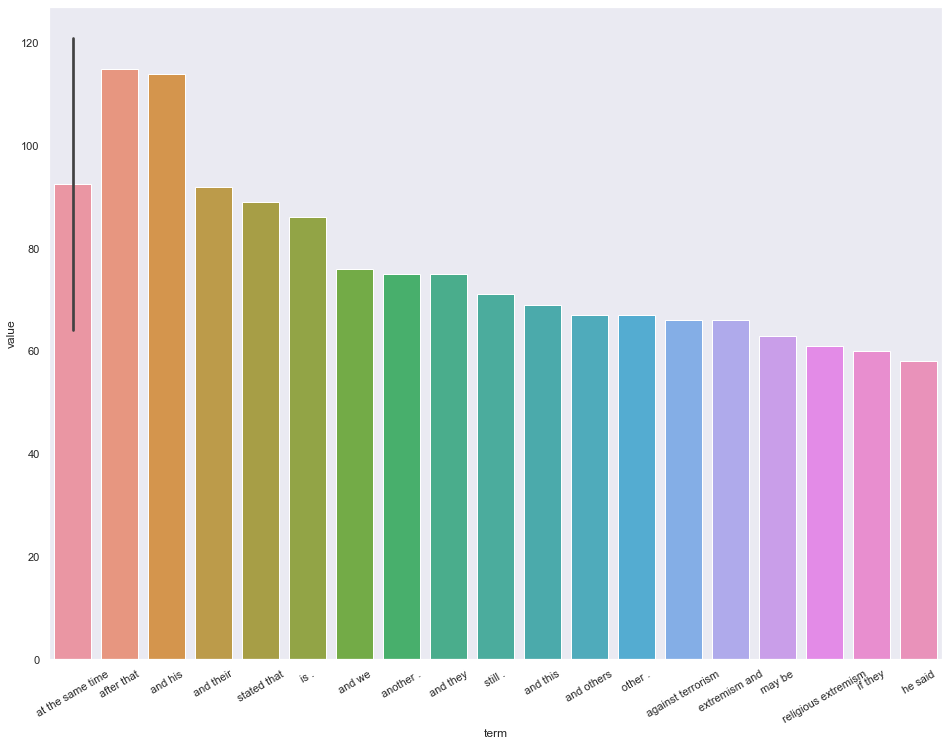

In [103]:
g = sns.barplot(x="term", y="value", data=bigram_df_t[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'God Almighty'),
 Text(0, 0, 'hello .'),
 Text(0, 0, 'verse of surah'),
 Text(0, 0, 'and hello'),
 Text(0, 0, 'God bless him'),
 Text(0, 0, 'good and'),
 Text(0, 0, 'be satisfied'),
 Text(0, 0, 'the answer is'),
 Text(0, 0, 'Messenger of God'),
 Text(0, 0, "God's blessing"),
 Text(0, 0, 'one day'),
 Text(0, 0, 'although .'),
 Text(0, 0, 'doomsday .'),
 Text(0, 0, 'really .'),
 Text(0, 0, 'especially kind'),
 Text(0, 0, 'of God'),
 Text(0, 0, 'god too'),
 Text(0, 0, 'says .'),
 Text(0, 0, 'human being')]

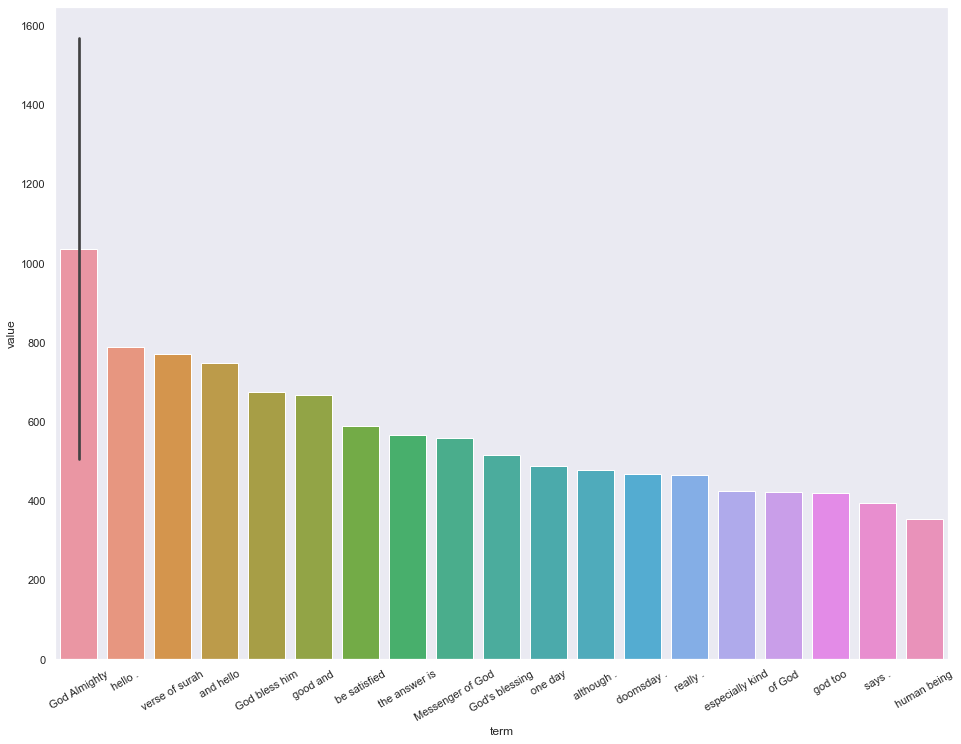

In [104]:
g = sns.barplot(x="term", y="value", data=bigram_df_n[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

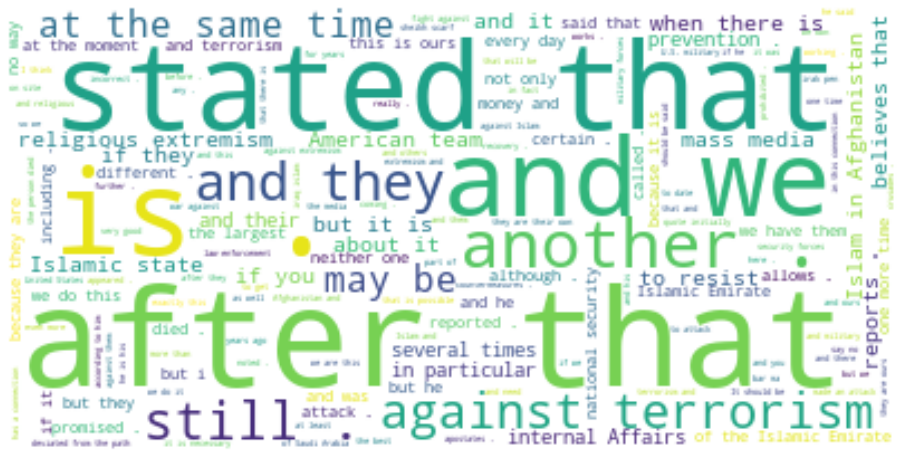

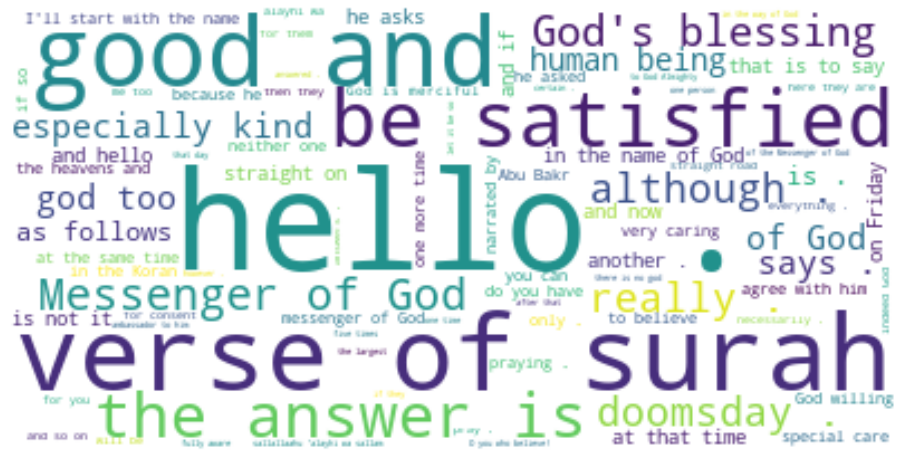

In [105]:
bidict = dict(bigram_df_t.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(bidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

bidict = dict(bigram_df_n.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(bidict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Trigram

In [106]:
trigram_df_t = get_gram(df.loc[df['label'] == 1].text.tolist(), 3)



Trigram : 
                                          term  value
56992                            and others .     35
39914                 religious extremism and     31
123015                extremism and terrorism     30
127897                                  any .     29
9008                 United States of America     27
77494                   and against terrorism     26
13305          Islamic Emirate of Afghanistan     25
13308   of the Islamic Emirate of Afghanistan     25
33170                            mass media .     18
129096                            to resist .     17
142190                                still .     15
123018                extremism and terrorism     15
33175                            in the media     15
9015                 United States of America     15
92057                             until now .     14
110475                    counter-terrorism .     13
109387                           once again .     13
110400                terrorism 

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: DataFrame columns are not unique, some columns will be omitted.


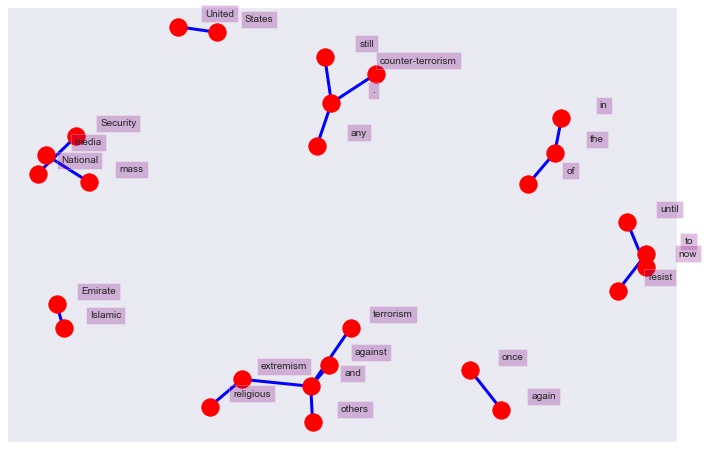

In [107]:
print ("\n\nTrigram : \n", trigram_df_t.head(n_tops))
plotting_ngram(trigram_df_t, n_tops)

In [114]:
trigram_df_n = get_gram(df.loc[df['label'] == 0].text.tolist(), 3)



Trigram : 
                                                     term  value
407992                                       I greet you    740
324792                            kindness and greetings    640
39112                                    God's grace and    513
486384                                     God bless him    465
62789                                very caring special    226
487486                               be pleased with him    225
690736                       The care is especially kind    223
38499                       I begin with the name of God    223
234665                        God is especially merciful    219
43447                            allahu alayhi wa sallam    214
35188                                      God willing .    211
402607  in the name of God, Most Gracious, Most Merciful    210
50946                                   alayhi wa sallam    185
520549                     sallallaahu 'alayhi wa sallam    184
200368                    

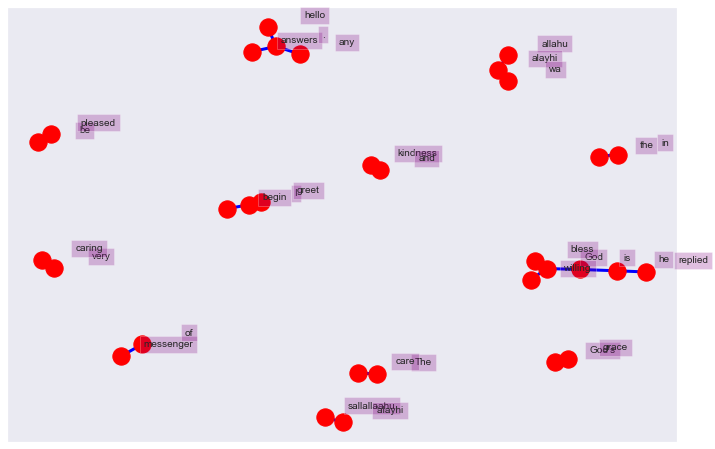

In [115]:
print ("\n\nTrigram : \n", trigram_df_n.head(n_tops))
plotting_ngram(trigram_df_n, n_tops)

[Text(0, 0, 'and others .'),
 Text(0, 0, 'religious extremism and'),
 Text(0, 0, 'extremism and terrorism'),
 Text(0, 0, 'any .'),
 Text(0, 0, 'United States of America'),
 Text(0, 0, 'and against terrorism'),
 Text(0, 0, 'Islamic Emirate of Afghanistan'),
 Text(0, 0, 'of the Islamic Emirate of Afghanistan'),
 Text(0, 0, 'mass media .'),
 Text(0, 0, 'to resist .'),
 Text(0, 0, 'still .'),
 Text(0, 0, 'in the media'),
 Text(0, 0, 'until now .'),
 Text(0, 0, 'counter-terrorism .'),
 Text(0, 0, 'once again .'),
 Text(0, 0, 'terrorism and extremism'),
 Text(0, 0, 'National Security Committee')]

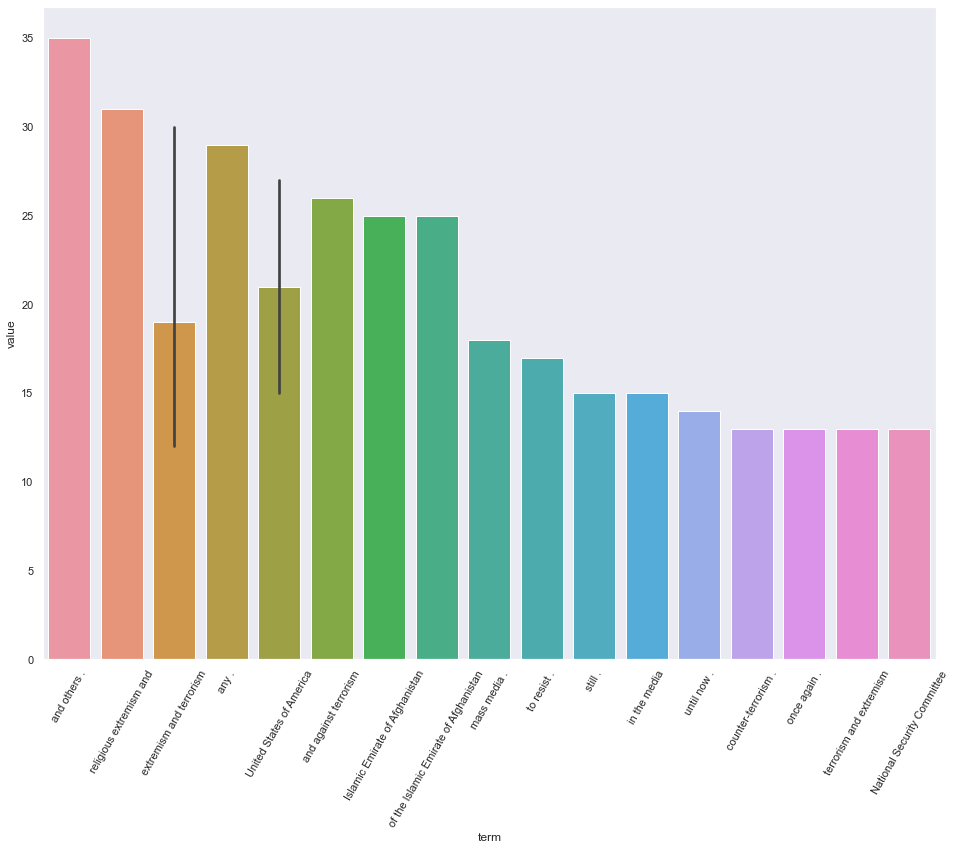

In [116]:
g = sns.barplot(x="term", y="value", data=trigram_df_t[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=60)

[Text(0, 0, 'I greet you'),
 Text(0, 0, 'kindness and greetings'),
 Text(0, 0, "God's grace and"),
 Text(0, 0, 'God bless him'),
 Text(0, 0, 'very caring special'),
 Text(0, 0, 'be pleased with him'),
 Text(0, 0, 'The care is especially kind'),
 Text(0, 0, 'I begin with the name of God'),
 Text(0, 0, 'God is especially merciful'),
 Text(0, 0, 'allahu alayhi wa sallam'),
 Text(0, 0, 'God willing .'),
 Text(0, 0, 'in the name of God, Most Gracious, Most Merciful'),
 Text(0, 0, 'alayhi wa sallam'),
 Text(0, 0, "sallallaahu 'alayhi wa sallam"),
 Text(0, 0, 'answers .'),
 Text(0, 0, 'he replied .'),
 Text(0, 0, 'he is such a god'),
 Text(0, 0, 'messenger of God to him'),
 Text(0, 0, 'any .'),
 Text(0, 0, 'hello .')]

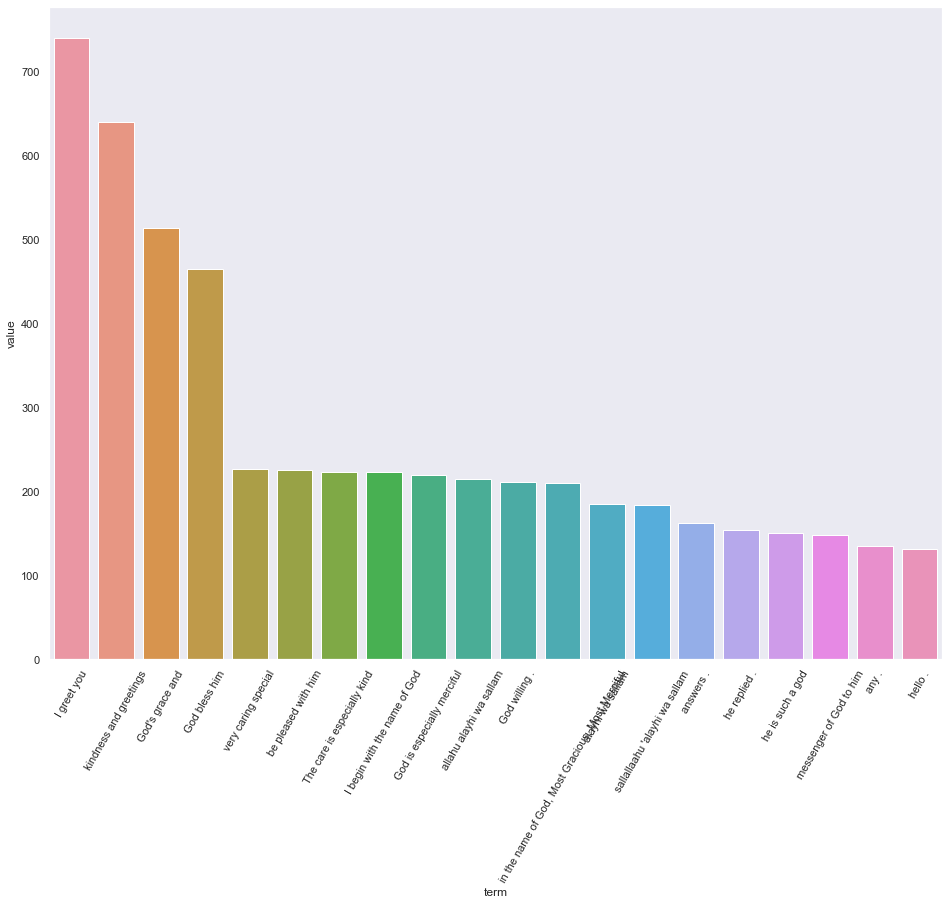

In [117]:
g = sns.barplot(x="term", y="value", data=trigram_df_n[:20])
g.set_xticklabels(g.get_xticklabels(), rotation=60)

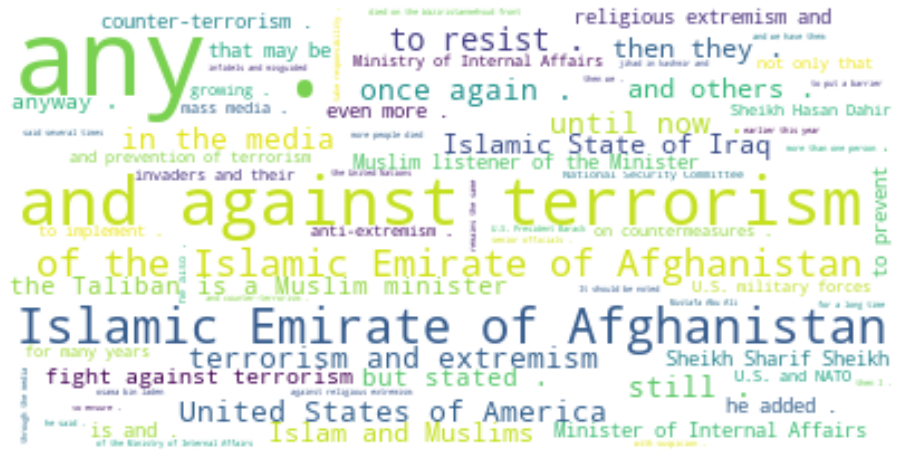

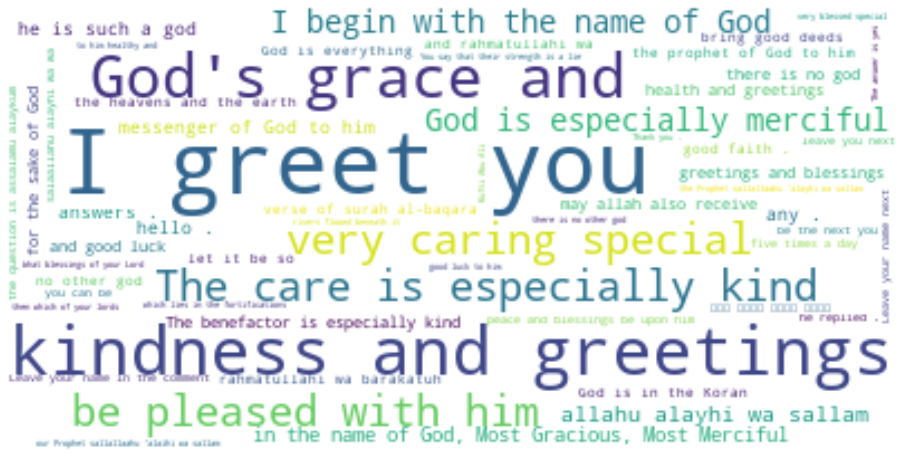

In [118]:
tridict = dict(trigram_df_t.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(tridict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

tridict = dict(trigram_df_n.values)
wordcloud = WordCloud(max_words=2000, background_color="white").generate_from_frequencies(tridict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Quadrigram